In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Section 1

In [ ]:
dataset = np.load('/content/drive/MyDrive/mnist.npz')

X = dataset['X'].T.astype('float')
y = dataset['y'].T.reshape((60000))

In [ ]:
print(X.shape,X.dtype)
print(y.shape,y.dtype)

(60000, 784) float64
(60000,) float64


index: 45800, Label: 7


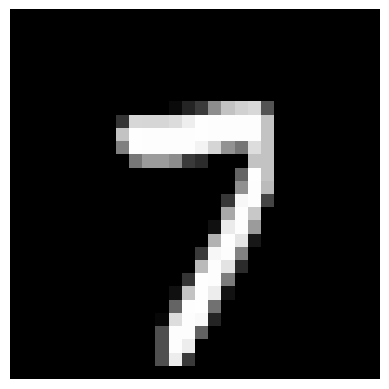

In [ ]:
index = 45800
image = X[index]
image = image.reshape((28, 28))
print(f'index: {index}, Label: {int(y[index])}')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Section 2

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Section 3

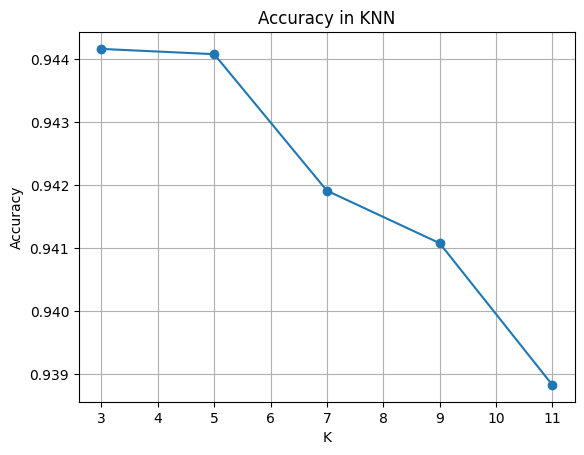

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

K_values = [3, 5, 7, 9, 11]
accuracy_values = []

for k in K_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    
    
plt.plot(K_values, accuracy_values, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy in KNN')
plt.grid(True)
plt.show()


In [ ]:
best_KNN = max(accuracy_values)
for i in range(len(accuracy_values)):
    print(f'accuracy: {accuracy_values[i]:.4f}, K: {K_values[i]}')
print(f'best accuracy: {best_KNN:.4f}')

accuracy: 0.9442, K: 3
accuracy: 0.9441, K: 5
accuracy: 0.9419, K: 7
accuracy: 0.9411, K: 9
accuracy: 0.9388, K: 11
best accuracy: 0.9442


# Section 4

In [ ]:
class_0_1_indices = np.where((y_train == 0) | (y_train == 1))[0]
X_train_0_1 = X_train_scaled[class_0_1_indices]
y_train_0_1 = y_train[class_0_1_indices]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

svm = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm, X_train_0_1, y_train_0_1, cv=kfold, scoring='accuracy')

mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.9964475630323311


# Section 5

In [ ]:
from itertools import combinations

class_pairs = list(combinations(range(10), 2))  

lowest_accuracy = 1.0  
most_difficult_classes = None  
p = 0
num = 1

for pair in class_pairs:
    my_pair = pair[0]
    pair_indices_train = np.isin(y_train, pair)
    pair_indices_test = np.isin(y_test, pair)
    
    X_pair_train = X_train_scaled[pair_indices_train]
    y_pair_train = y_train[pair_indices_train]
    
    X_pair_test = X_test_scaled[pair_indices_test]
    y_pair_test = y_test[pair_indices_test]
    
    svm = SVC()
    svm.fit(X_pair_train, y_pair_train)
    
    accuracy = svm.score(X_pair_test, y_pair_test)
    if not my_pair == p:
        print()
        p = p + 1 
    print(f'{num}. accuracy: {accuracy:.4f}, Numbers: {pair[0]} and {pair[1]}')
     
    num = num + 1

    if accuracy < lowest_accuracy:
        lowest_accuracy = accuracy
        most_difficult_classes = pair

print("Most Difficult Classes:", most_difficult_classes)
print("Accuracy:", lowest_accuracy)


1. accuracy: 0.9972, Numbers: 0 and 1
2. accuracy: 0.9945, Numbers: 0 and 2
3. accuracy: 0.9971, Numbers: 0 and 3
4. accuracy: 0.9970, Numbers: 0 and 4
5. accuracy: 0.9952, Numbers: 0 and 5
6. accuracy: 0.9921, Numbers: 0 and 6
7. accuracy: 0.9979, Numbers: 0 and 7
8. accuracy: 0.9933, Numbers: 0 and 8
9. accuracy: 0.9975, Numbers: 0 and 9

10. accuracy: 0.9904, Numbers: 1 and 2
11. accuracy: 0.9926, Numbers: 1 and 3
12. accuracy: 0.9943, Numbers: 1 and 4
13. accuracy: 0.9919, Numbers: 1 and 5
14. accuracy: 0.9961, Numbers: 1 and 6
15. accuracy: 0.9935, Numbers: 1 and 7
16. accuracy: 0.9926, Numbers: 1 and 8
17. accuracy: 0.9925, Numbers: 1 and 9

18. accuracy: 0.9844, Numbers: 2 and 3
19. accuracy: 0.9939, Numbers: 2 and 4
20. accuracy: 0.9921, Numbers: 2 and 5
21. accuracy: 0.9941, Numbers: 2 and 6
22. accuracy: 0.9871, Numbers: 2 and 7
23. accuracy: 0.9831, Numbers: 2 and 8
24. accuracy: 0.9885, Numbers: 2 and 9

25. accuracy: 0.9948, Numbers: 3 and 4
26. accuracy: 0.9828, Numbers: 

# another like of Section 5

In [ ]:
class SVMModel:
    svm_models = dict()

    def select_classes_data(self, class1, class2):
        class_index = np.where((y_train == class1) | (y_train == class2))[0]
        X_train_selected = X_train_scaled[class_index]
        y_train_selected = y_train[class_index]
        return X_train_selected , y_train_selected
    
    def k_fold_validation(self, X_train_selected, y_train_selected):
        svm_model = SVC()
        accuracies = cross_val_score(svm_model, X_train_selected, np.ravel(y_train_selected))
        return np.mean(accuracies)
    
    def evaluate_distinct_classes(self):
        num = 1 
        lowest_accuracy = 1.0
        most_difficult_classes = None
        for i in range(10):
            for j in range(10):
                if i != j and i < j:
                    X, y = self.select_classes_data(i, j)
                    mean_accuracy = self.k_fold_validation(X, y)
                    print(f"{num}.Accuracy in SVM model : {i} and {j},  mean: {mean_accuracy:.4f}")
                    num += 1    
                    if mean_accuracy < lowest_accuracy:
                        lowest_accuracy = mean_accuracy
                        most_difficult_classes = tuple((i , j))
            print()  
               
        print("Most Difficult Classes:", most_difficult_classes)
        print("accuracy:", lowest_accuracy)
    
    def create_distinct_classes(self):
        model = SVC()
        for i in range(10):
            for j in range(10):
                if i != j and i < j:
                    model_name = f'svm_{str(i)}_{str(j)}'
                    X, y = self.select_classes_data(i, j)
                    self.svm_models[model_name] = model.fit(X, np.ravel(y))

In [ ]:
svmmodel = SVMModel()
svmmodel.evaluate_distinct_classes()

1.Accuracy in SVM model : 0 and 1,  mean: 0.9967
2.Accuracy in SVM model : 0 and 2,  mean: 0.9935
3.Accuracy in SVM model : 0 and 3,  mean: 0.9954
4.Accuracy in SVM model : 0 and 4,  mean: 0.9961
5.Accuracy in SVM model : 0 and 5,  mean: 0.9933
6.Accuracy in SVM model : 0 and 6,  mean: 0.9926
7.Accuracy in SVM model : 0 and 7,  mean: 0.9957
8.Accuracy in SVM model : 0 and 8,  mean: 0.9937
9.Accuracy in SVM model : 0 and 9,  mean: 0.9953

10.Accuracy in SVM model : 1 and 2,  mean: 0.9934
11.Accuracy in SVM model : 1 and 3,  mean: 0.9942
12.Accuracy in SVM model : 1 and 4,  mean: 0.9941
13.Accuracy in SVM model : 1 and 5,  mean: 0.9955
14.Accuracy in SVM model : 1 and 6,  mean: 0.9958
15.Accuracy in SVM model : 1 and 7,  mean: 0.9935
16.Accuracy in SVM model : 1 and 8,  mean: 0.9930
17.Accuracy in SVM model : 1 and 9,  mean: 0.9947

18.Accuracy in SVM model : 2 and 3,  mean: 0.9815
19.Accuracy in SVM model : 2 and 4,  mean: 0.9897
20.Accuracy in SVM model : 2 and 5,  mean: 0.9904
21.Accu

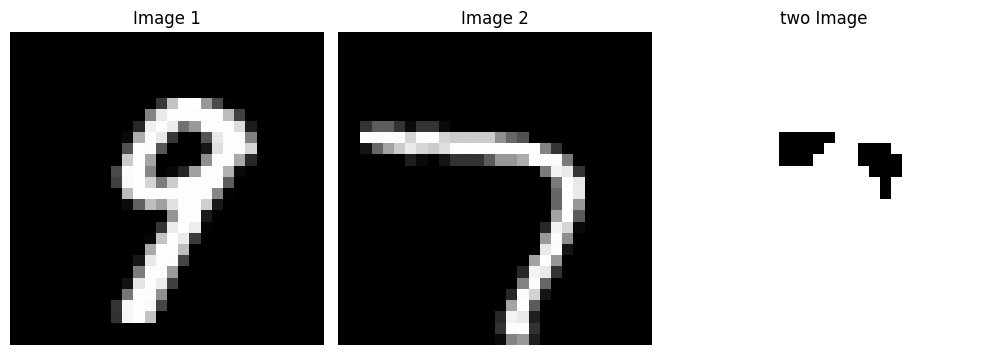

In [ ]:
index9 = 59500
index7 = 45700

image1 = X[index9].reshape((28, 28))
image2 = X[index7].reshape((28, 28))

two_image = np.zeros_like(image1)  
two_image[(image1 > 0) & (image2 > 0)] = 1  

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(image1, cmap='gray')
axs[0].set_title('Image 1')
axs[0].axis('off')

axs[1].imshow(image2, cmap='gray')
axs[1].set_title('Image 2')
axs[1].axis('off')

axs[2].imshow(two_image, cmap='binary')
axs[2].set_title('two Image')
axs[2].axis('off')
plt.tight_layout()

plt.show()


# Section 6

In [ ]:
from itertools import combinations
from collections import Counter

class_pairs = list(combinations(range(10), 2))

svm_models = []  

for pair in class_pairs:
    pair_indices_train = np.isin(y_train, pair)
    
    X_pair_train = X_train_scaled[pair_indices_train]
    y_pair_train = y_train[pair_indices_train]
    
    svm = SVC()
    svm.fit(X_pair_train, y_pair_train)
    
    svm_models.append(svm)

y_preds = np.zeros((len(X_test_scaled), len(class_pairs)))  

for i, svm in enumerate(svm_models):
    y_preds[:, i] = svm.predict(X_test_scaled)

y_pred_final = np.zeros(len(X_test_scaled))

for i in range(len(X_test_scaled)):
    votes = Counter(y_preds[i])
    most_common_label = votes.most_common(1)[0][0]
    y_pred_final[i] = most_common_label

accuracy = accuracy_score(y_test, y_pred_final)

for i, svm in enumerate(svm_models):
    y_pred = y_preds[:, i]
    print("Model", i+1)
    print("Predictions:", y_pred)
    print("True Labels:", y_test)
    print("---")

print("Final Predictions:", y_pred_final)
print("Accuracy:", accuracy)


Model 1
Predictions: [1. 0. 1. ... 0. 1. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 2
Predictions: [2. 0. 2. ... 2. 2. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 3
Predictions: [3. 0. 3. ... 3. 0. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 4
Predictions: [4. 0. 4. ... 4. 4. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 5
Predictions: [5. 0. 5. ... 5. 5. 5.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 6
Predictions: [6. 6. 6. ... 6. 6. 6.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 7
Predictions: [7. 0. 7. ... 7. 7. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 8
Predictions: [8. 0. 8. ... 8. 8. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 9
Predictions: [9. 0. 9. ... 9. 9. 0.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 10
Predictions: [1. 2. 2. ... 2. 2. 2.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 11
Predictions: [1. 3. 1. ... 3. 1. 3.]
True Labels: [1. 6. 6. ... 7. 4. 6.]
---
Model 12
Predictions: [1. 4. 4. ... 4. 4. 4.]
True L

# Section 7

In [ ]:
print(f'Best KNN Accuracy: {best_KNN:.4f}')
print(f'SVM Accuracy: {accuracy:.4f}')

Best KNN Accuracy: 0.9442
SVM Accuracy: 0.9637
